In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("Copy of ratings_Electronics.csv", error_bad_lines=False, encoding="latin-1")
data.columns = ['userId','productId','ratings','timestamp']

In [3]:
data.head()

,userId,productId,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [4]:
data.shape

(7824481, 4)

In [5]:
data.dtypes

userId        object
productId     object
ratings      float64
timestamp      int64
dtype: object

In [6]:
data = data.drop('timestamp',axis=1)

In [7]:
data.head()

,userId,productId,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [8]:
import seaborn as sns #import seaborn as sns for plotting scatter matrix

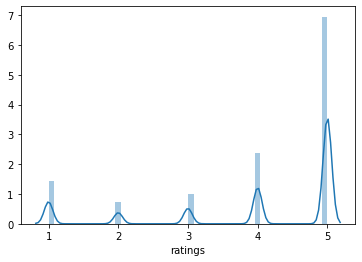

In [9]:
sns.distplot(data.ratings)

In [10]:
vc = data.userId.value_counts() #look for value_counts of userId

In [11]:
vc

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A2D2TV6FIW6JJ7      1
A2TRS0ARHW4HQV      1
A17R36UNKALY2D      1
A1ZF40XUYRFRAO      1
A1RKT6HWHE8U5       1
Name: userId, Length: 4201696, dtype: int64

In [12]:
data = data[data.userId.isin(vc.index[vc.gt(49)])] #users whose ids value_count is greater than 99

In [13]:
data.groupby('productId')['ratings'].mean().sort_values(ascending = False).head()

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

In [14]:
data.groupby('productId')['ratings'].count().sort_values(ascending = False).head()

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

In [15]:
data_mean_count = pd.DataFrame(data.groupby('productId')['ratings'].mean())
data_mean_count['ratingsCount'] = pd.DataFrame(data.groupby('productId')['ratings'].count())
data_mean_count.sort_values(by = 'ratingsCount', ascending = False).head()

,ratings,ratingsCount
productId,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149


In [16]:
data_mean_count.sort_values(by = 'ratings', ascending = False).head()

,ratings,ratingsCount
productId,,
0594451647,5.0,1
B003RRY9RS,5.0,1
B003RR95Q8,5.0,1
B003RIPMZU,5.0,1
B003RFRNYQ,5.0,2


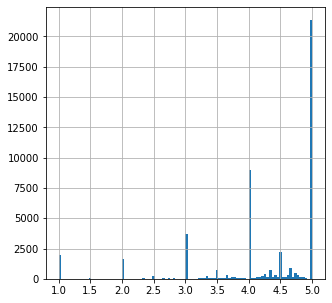

In [17]:
plt.figure(figsize=(5,5))
data_mean_count['ratings'].hist(bins=100)

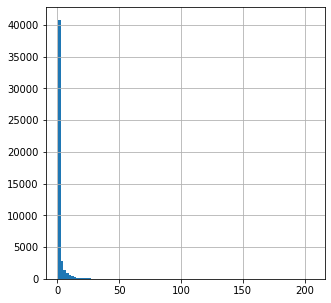

In [18]:
plt.figure(figsize=(5,5))
data_mean_count['ratingsCount'].hist(bins=100)

In [19]:
from surprise import Dataset,Reader
from surprise import KNNBaseline
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 10))

In [20]:
data = Dataset.load_from_df(data[['userId', 'productId', 'ratings']], reader)
data

In [21]:
# Collaborative Filtering model
trainset,testset= train_test_split(data,test_size=0.30) #split the data into train set (70%) and test set (30%)
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x000000000BBAC648>

In [22]:
from surprise import SVD
from surprise import accuracy

In [23]:
svd = SVD(n_factors=50,biased=False)
svd.fit(trainset)

In [24]:
test_pred = svd.test(testset) #predict the test set

In [25]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 2.0211


2.021132607009171

In [26]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == 'A38KK0SZYEH5UD'][['iid', 'r_ui']].sort_values(by = 'r_ui',ascending = False).head()
# get top 5 recommendations

,iid,r_ui
19543,B00018MSNI,5.0
17473,B001IAYUM0,5.0
30144,B003MOKUIS,5.0
28512,B00322OOXM,5.0
28504,B00F3F381A,5.0


In [27]:
#Summary
'''
Top 5 recommendations using Collaborative Filtering model for user A38KK0SZYEH5UD is displayed above.
The products are highly rated based by user users and are recommended to user A38KK0SZYEH5UD based on his/her habits.
''' 

'\nTop 5 recommendations using Collaborative Filtering model for user A38KK0SZYEH5UD is displayed above.\nThe products are highly rated based by user users and are recommended to user A38KK0SZYEH5UD based on his/her habits.\n'